In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

In [3]:
# Loading the dataset
Weather_szeged = pd.read_csv('weather szeged.csv')

In [5]:
szeged_Weather = Ocean_df[['Apparent Temperature (C)','Humidity']]

In [6]:
# Getting the dimensions of the dataset
szeged_Weather.shape

(96453, 2)

In [8]:
szeged_Weather.describe

<bound method NDFrame.describe of        Apparent Temperature (C)  Humidity
0                      7.388889      0.89
1                      7.227778      0.86
2                      9.377778      0.89
3                      5.944444      0.83
4                      6.977778      0.83
...                         ...       ...
96448                 26.016667      0.43
96449                 24.583333      0.48
96450                 22.038889      0.56
96451                 21.522222      0.60
96452                 20.438889      0.61

[96453 rows x 2 columns]>

In [9]:
szeged_Weather.head()

,Apparent Temperature (C),Humidity
0,7.388889,0.89
1,7.227778,0.86
2,9.377778,0.89
3,5.944444,0.83
4,6.977778,0.83


In [12]:
# Calculating the percentage of values missing in each column
values_list = list()
cols_list = list()
for col in szeged_Weather.columns:
    pct_missing = np.mean(szeged_Weather[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)
pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = values_list
print(values_list)

[0.0, 0.0]


count    96453.000000
mean        10.855029
std         10.696847
min        -27.716667
25%          2.311111
50%         12.000000
75%         18.838889
max         39.344444
Name: Apparent Temperature (C), dtype: float64


C:\Users\olatu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


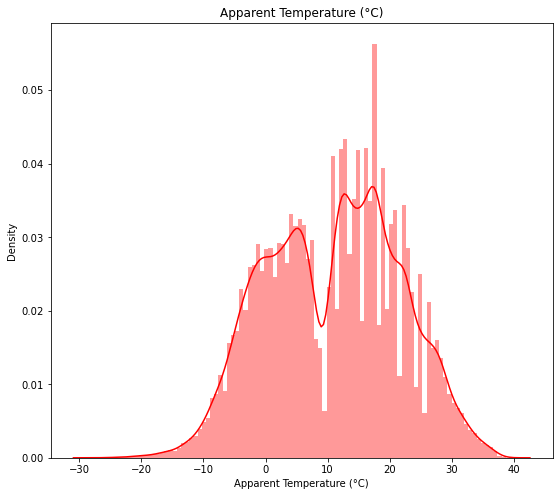

In [14]:
# Description of the Apparent temperature column

print(szeged_Weather["Apparent Temperature (C)"].describe())
plt.figure(figsize=(9, 8))
sns.distplot(szeged_Weather["Apparent Temperature (C)"], color='r', bins=100, hist_kws={'alpha': 0.4}).set(xlabel='Apparent Temperature (°C)',title='Apparent Temperature (°C)');

count    96453.000000
mean         0.734899
std          0.195473
min          0.000000
25%          0.600000
50%          0.780000
75%          0.890000
max          1.000000
Name: Humidity, dtype: float64


C:\Users\olatu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


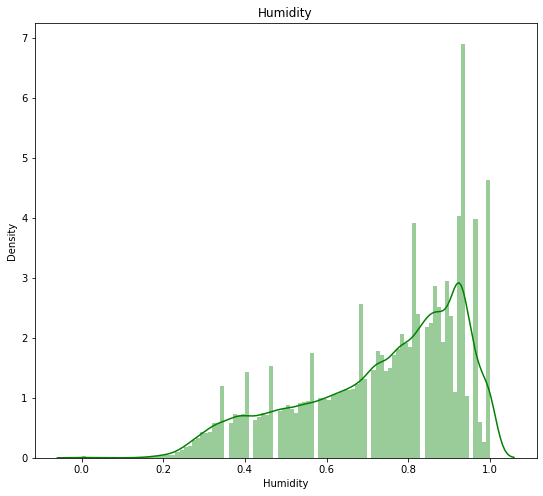

In [16]:
# Description of the Humidity column

print(szeged_Weather["Humidity"].describe())
plt.figure(figsize=(9, 8))
sns.distplot(szeged_Weather["Humidity"], color='g', bins=100, hist_kws={'alpha': 0.4}).set(xlabel='Humidity',title='Humidity');

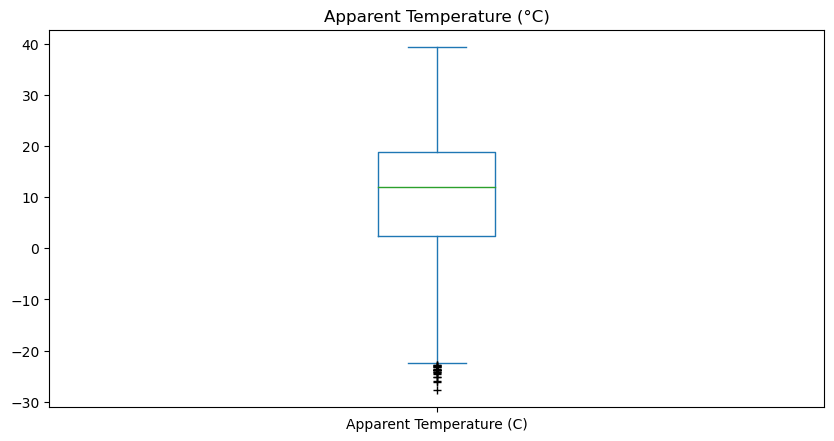

In [17]:
# Apparent Temperature Boxplot
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
# plot boxplot
szeged_Weather["Apparent Temperature (C)"].plot.box(sym='+')
plt.title('Apparent Temperature (°C)');

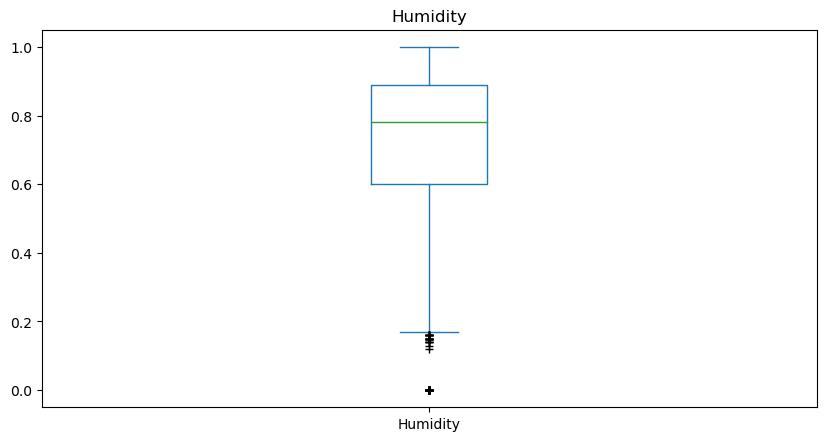

In [20]:
# Humidity Boxplot
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
# plot boxplot
szeged_Weather["Humidity"].plot.box(sym='+')
plt.title('Humidity');

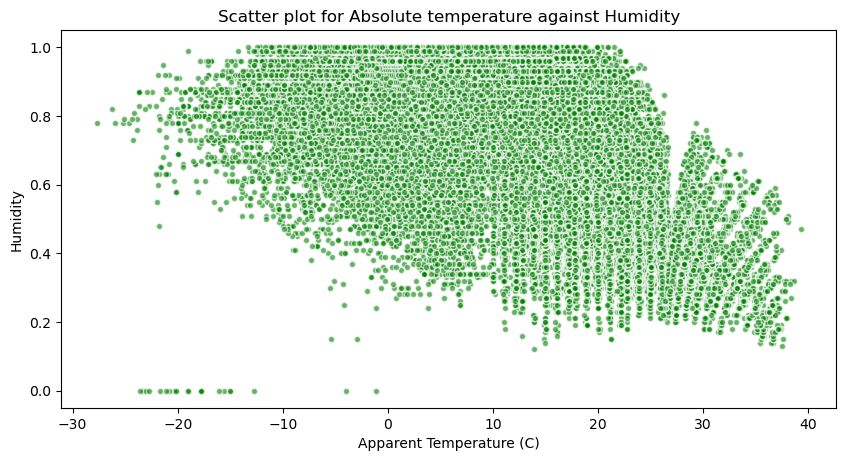

In [21]:
# Scatter plot for Absolute temperature against Humidity
szeged_Weather.plot.scatter(x="Apparent Temperature (C)", y="Humidity",color='green',alpha=0.6,edgecolors="white",linewidth=1)
plt.title('Scatter plot for Absolute temperature against Humidity')
plt.show()

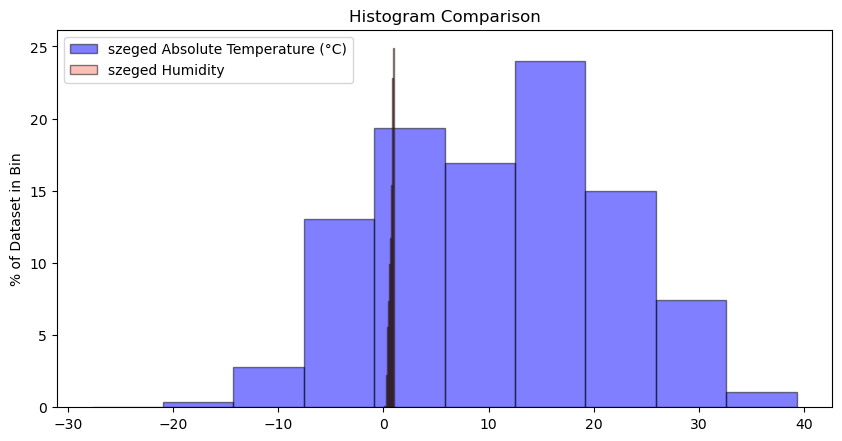

In [22]:
# Histogram comparison for Absolute temperature against Humidity
xweights = 100 * np.ones_like(szeged_Weather["Apparent Temperature (C)"]) / szeged_Weather["Apparent Temperature (C)"].size
yweights = 100 * np.ones_like(szeged_Weather["Humidity"])/szeged_Weather["Humidity"].size

fig, ax = plt.subplots()
ax.hist(szeged_Weather["Apparent Temperature (C)"], weights=xweights,label= 'szeged Absolute Temperature (°C)', color='blue', alpha=0.5, edgecolor='black')
ax.hist(szeged_Weather["Humidity"], weights=yweights,label='szeged Humidity', color='salmon', alpha=0.5, edgecolor='black')

ax.set(title='Histogram Comparison', ylabel='% of Dataset in Bin')
ax.margins(0.05)
ax.set_ylim(bottom=0)
plt.legend()
plt.show()

In [23]:
Apparent_Temp = szeged_Weather["Apparent Temperature (C)"]
Humidity = szeged_Weather["Humidity"]

In [25]:
Apparent_Temp = np.array(Apparent_Temp).reshape((len(Apparent_Temp), 1))

In [26]:
model = LinearRegression().fit(Apparent_Temp, Humidity)

In [31]:
Humidity = np.array(Humidity).reshape((len(Humidity), 1))

In [32]:
prediction = model.predict(Humidity)

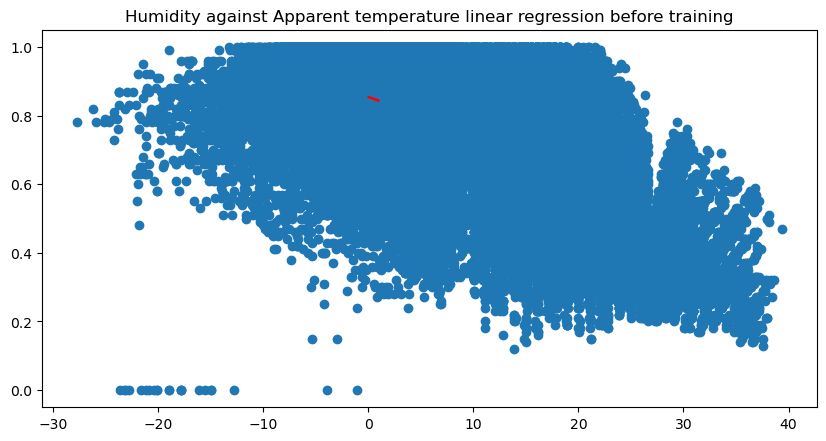

In [35]:
plt.scatter(Apparent_Temp,Humidity)
plt.plot(Humidity, prediction, color="red")
plt.title('Humidity against Apparent temperature linear regression before training')
plt.show()